<a href="https://colab.research.google.com/github/kjso3887/TinyML/blob/master/tflite_model_maker_package_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tflite_model_maker 전이학습을 위해 갖고있는 데이터셋 업로드하기

In [2]:
pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 5.5 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 840 kB 35.5 MB/s 
     |████████████████████████████████| 1.2 MB 35.5 MB/s 
     |████████████████████████████████| 6.3 MB 35.2 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 103 kB 46.2 MB/s 
     |████████████████████████████████| 211 kB 45.4 MB/s 
     |████████████████████████████████| 636 kB 44.7 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 120 kB 46.4 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
     |████████████████████████████████| 352 kB 40.8 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 200 kB 41.8 MB/s 


In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker import ImageClassifierDataLoader

import matplotlib.pyplot as plt
from PIL import Image as im

- 구글 드라이브 마운트를 통해 데이터셋을 가져옴

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir dataset

- 데이터셋이 존재하는 package1 폴더를 데이터셋을 새로 생성한 dataset 폴더에 복사

In [6]:
!cp -r /content/drive/MyDrive/package1 dataset/

- 이 부분에서 image_path를 dataset 폴더 까지만 지정했어야 했는데, /dataset/package1 까지 지정해서 image size zero 오류가 계속 발생함. image_path를 출력해서 경로가 잘 설정되었는지 확인.

In [20]:
image_path = "/content/dataset"
print(image_path)

/content/dataset


In [27]:
rmdir /content/dataset/package1/.ipynb_checkpoints

rmdir: failed to remove '/content/dataset/package1/.ipynb_checkpoints': No such file or directory


DataLoader.from_folder() 메서드를 이용해서 데이터셋을 가져온 후 train,test_data를 9대1 비율로 나누어줌.

In [28]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 235, num_label: 3, labels: .ipynb_checkpoints, None, package1.


INFO:tensorflow:Load image with size: 235, num_label: 3, labels: .ipynb_checkpoints, None, package1.


In [44]:
model_spec.input_image_shape = (416, 416)

In [45]:
model = image_classifier.create(train_data, epochs = 10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_5 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


6/6 [==============================] - 5s 350ms/step - loss: 0.6974 - accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 2s 346ms/step - loss: 0.4899 - accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 2s 345ms/step - loss: 0.5872 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 2s 347ms/step - loss: 0.5304 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 2s 348ms/step - loss: 0.4059 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 2s 346ms/step - loss: 0.3315 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 2s 342ms/step - loss: 0.3361 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 2s 349ms/step - loss: 0.3126 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 2s 347ms/step - loss: 0.3166 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 2s 349ms/step - loss: 0.3124 - accuracy: 1.0000


In [46]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.3074 - accuracy: 1.0000


In [47]:
label_names = data.index_to_label
label_names

['.ipynb_checkpoints', 'None', 'package1']

In [48]:
predictions = model.predict_top_k(test_data)
predictions[:4]

[[('package1', 0.9132746)],
 [('package1', 0.93069434)],
 [('package1', 0.8903866)],
 [('package1', 0.9266522)]]

In [59]:
model.export('model2.tflite', 'labels.txt')

INFO:tensorflow:Assets written to: /tmp/tmpnhy_wf48/assets


INFO:tensorflow:Assets written to: /tmp/tmpnhy_wf48/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpzvk83shi/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpzvk83shi/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: model2.tflite.zip/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: model2.tflite.zip/labels.txt


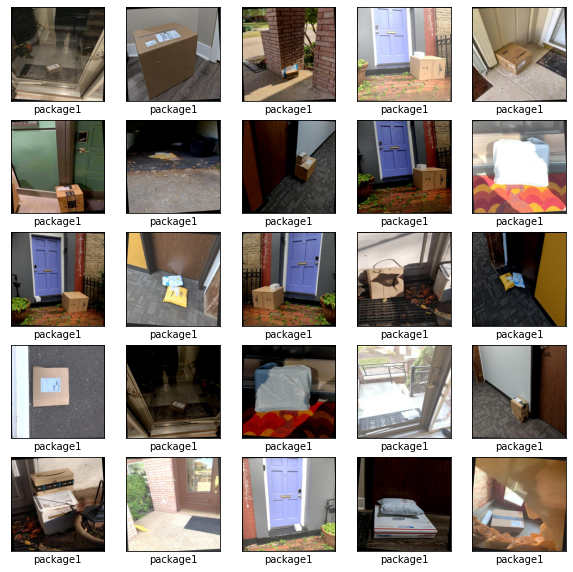

In [51]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()